In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
import seaborn as sns
import json
import sys
import codecs
import os
from collections import defaultdict, Counter

In [43]:
def show_histogram(d):
    plt.figure(figsize=(16,8))
    c = {k: len(d[k]) for k in d.keys()}
    bars, heights = zip(*c.items())
    y_pos = range(len(bars))
    plt.bar(y_pos, heights)
    plt.xticks(y_pos, bars, rotation=90)
    plt.show()

In [44]:
embedDir = "./MegaSentEmbs/"
dumpdir = "./dump/"
oldlist = os.listdir(embedDir)
filelist = sorted([embedDir+f for f in oldlist])
# filenum = len(filelist)
filenum = 5
# print(filelist)
smalllist = filelist[:filenum]
print("smalllist: ", smalllist)

smalllist:  ['./MegaSentEmbs/repository_embedding_100_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_101_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_102_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_103_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_104_2013-03-18.pkl']


#Read all the pandas dataframes

In [45]:
megadf = pd.DataFrame()
for f in smalllist:
    tempdf = pd.read_pickle(f)
    # print(tempdf.shape)
    megadf = megadf.append(tempdf, ignore_index = True)

print(megadf.shape)
print(megadf.tail())

(2433, 4)
           id                                              title  \
2428  9549863                         In Search of the Argonauts   
2429  9549864       When Is A National Team Not A National Team?   
2430  9549866                   Football and the Cyprus conflict   
2431  9549873  Optimisation of Mobile Communication Networks ...   
2432  9549874                        Free Search of Global Value   

                                               abstract  \
2428  [paper, examines, concerted, attempt, group, s...   
2429  [essay, analyzes, anomaly, recognition, place,...   
2430  [essay, look, football, role, cyprus, conflict...   
2431  [mini, conference, optimisation, mobile, commu...   
2432  [article, present, novel, investigation, two, ...   

                                              embedding  
2428  [-0.20942938586860307, 0.40039306438355393, -0...  
2429  [-0.1677260275156407, 0.26426473158190433, -0....  
2430  [-0.15642487500000005, 0.19240105999999996, -0

In [46]:
predata = megadf["embedding"]

data = np.matrix(predata.to_list())
print(data.shape)


(2433, 250)


#Number of Clusters

In [47]:
k = 50

In [48]:
print("Starting Clustering Process")
kmeans = cluster.KMeans(n_clusters=k, verbose=1, n_jobs=-1)
kmeans.fit(data)
print("k_means.fit(data) Done!")

Starting Clustering Process
k_means.fit(data) Done!


In [49]:
print("hello")

hello


In [50]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
megadf["clusterlabel"]=labels

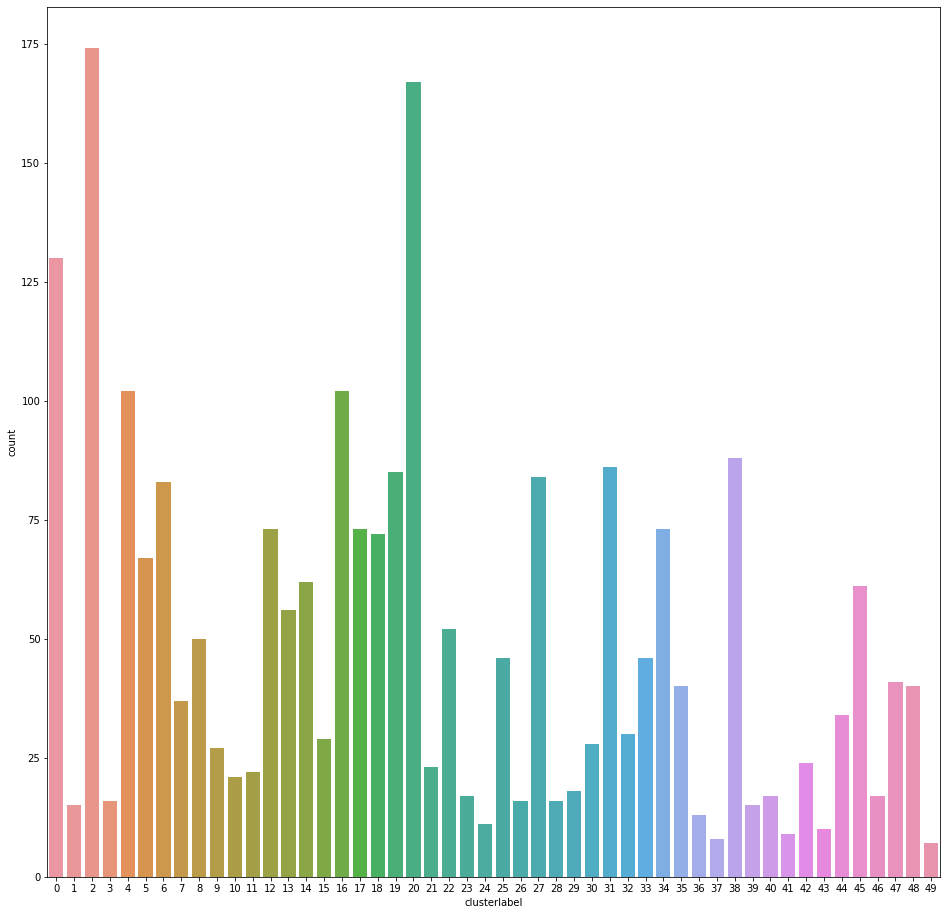

In [51]:
plt.figure(figsize=(16,16))
sns.countplot("clusterlabel", data=megadf)

In [64]:
import dtale
s = megadf[megadf["clusterlabel"] == 20]["title"]
# megadf.columns
# d = dtale.show(s)
s

748     Health care professionals' preferences for ext...
756     An examination of automatic video retrieval te...
767     Improving medical image perception by hierarch...
771     School-linked sexual health services for young...
818     Pasts and pagan practices: moving beyond Stone...
                              ...                        
2388    The effect of intensity of recommendations on ...
2389    The impact of subjective well being on adheren...
2393    THE EFFECTS OF ONLINE METACOGNITIVE INSTRUCTIO...
2395    Metacognition, Confidence and Bias in Software...
2422    How do African Clusters Evolve? Review and Syn...
Name: title, Length: 167, dtype: object

In [63]:
display(s)

'744     Understanding the scale and nature of outcome ...\n750     In-service Initial Teacher Education in the Le...\n751     Becoming a teacher: conceptual and practice de...\n752     Teacher knowledge and initial teacher educatio...\n755     On the writing, reading and publishing of digi...\n765     Fair school admissions: What is the contributi...\n772     A very British carnival: women, sex and transg...\n773       Using pattern languages in participatory design\n774     What is the future for undergraduate dissertat...\n775            Designing community care systems with AUML\n780                     Inside out: men on the Home Front\n782     Pornography and objectification: re-reading “t...\n783         Design as conversation with digital materials\n784     An investigation into the validation of formal...\n789     The experience of enchantment in human-compute...\n794     What do people do with porn? qualitative resea...\n795     ”Other” or “one of us”?:  the porn user in pub.